In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import os


In [60]:
# matplotlib.rcParams.update({'font.size': 25})

In [61]:

file_name = r"../playground/log_nes12.log"

losses = {
    "mean" : [],
    "mmd" : [],
    "avg" : [],
    "min" : [],
    "max" : [],
}

with open(file_name, "r") as f:
    for line in f:
        words = line.split(" ")
        if words[0] == "Mean":
            losses["mean"].append(float(words[-1]))
        if words[0] == "MMD":
            losses["mmd"].append(float(words[-1]))
        if words[0] == "Avg":
            losses["avg"].append(float(words[-1]))
        if words[0] == "Min":
            losses["min"].append(float(words[-1]))
        if words[0] == "Max":
            losses["max"].append(float(words[-1]))

df = pd.DataFrame(data=losses)
df.to_csv(f"../data/losses.csv", index=False)

FileNotFoundError: [Errno 2] No such file or directory: 'playground/log_nes12.log'

In [31]:
loss_df = pd.read_csv(r"../data/losses.csv")
loss_df["diff"] = loss_df["max"] - loss_df["min"]

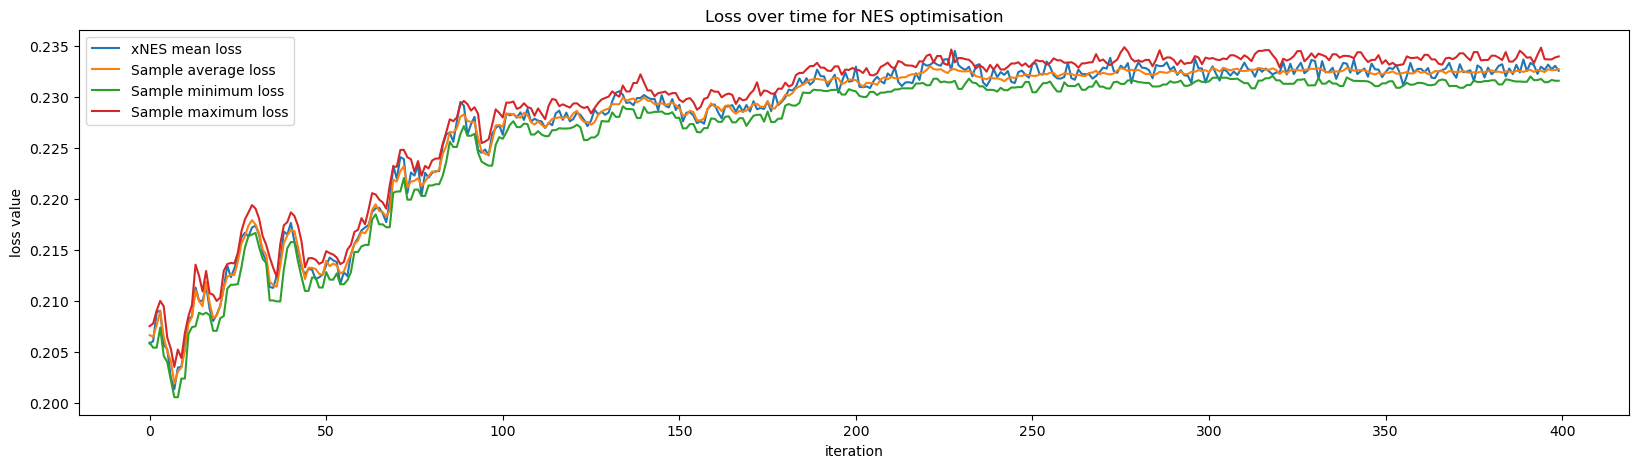

In [32]:
plt.figure(figsize=(20,5))
plt.plot(loss_df["mean"], label="xNES mean loss")
plt.plot(loss_df["avg"], label="Sample average loss")
plt.plot(loss_df["min"], label="Sample minimum loss")
plt.plot(loss_df["max"], label="Sample maximum loss")
plt.legend()
plt.xlabel("iteration")
plt.ylabel("loss value")
plt.title("Loss over time for NES optimisation")
plt.show()

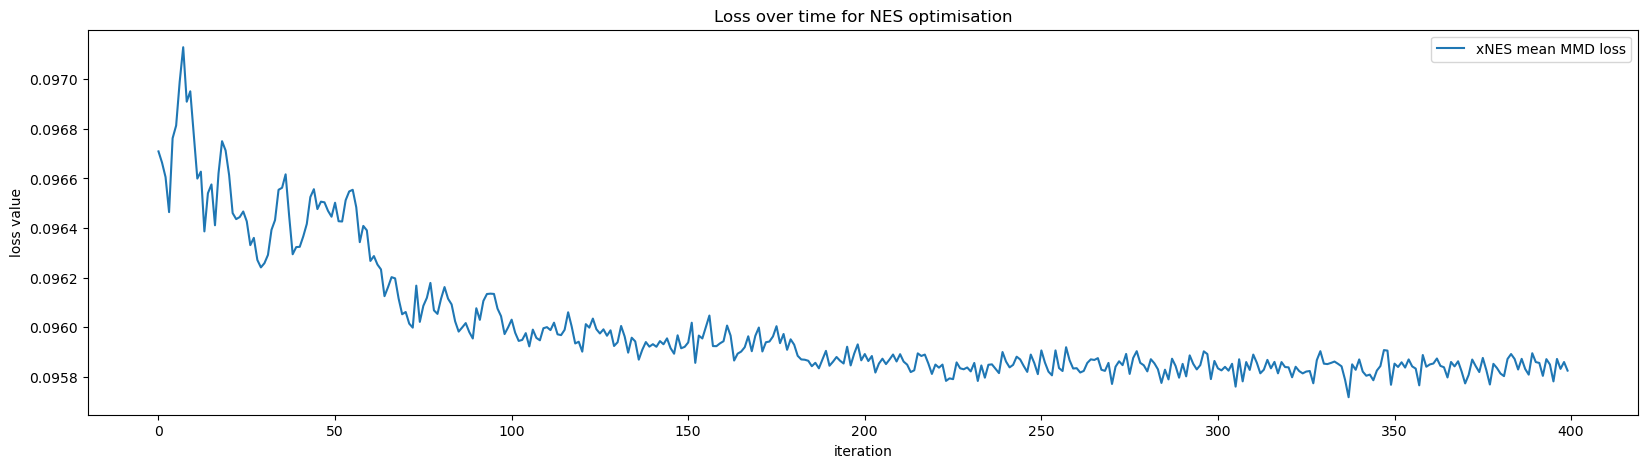

In [33]:
plt.figure(figsize=(20,5))
plt.plot(loss_df["mmd"], label="xNES mean MMD loss")
plt.legend()
plt.xlabel("iteration")
plt.ylabel("loss value")
plt.title("Loss over time for NES optimisation")
plt.show()

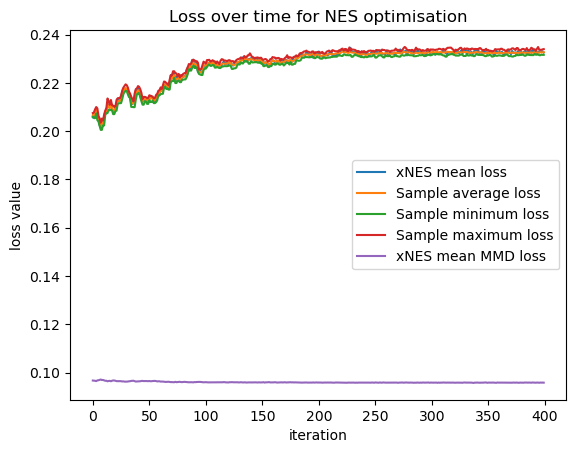

In [34]:
plt.plot(loss_df["mean"], label="xNES mean loss")
plt.plot(loss_df["avg"], label="Sample average loss")
plt.plot(loss_df["min"], label="Sample minimum loss")
plt.plot(loss_df["max"], label="Sample maximum loss")
plt.plot(loss_df["mmd"], label="xNES mean MMD loss")
plt.legend()
plt.xlabel("iteration")
plt.ylabel("loss value")
plt.title("Loss over time for NES optimisation")
plt.show()

In [50]:
def plot_standing_average(array, show=True):
    standing_average = []
    current = 0
    for i, loss in enumerate(array):
        current += loss
        standing_average.append(current / (i + 1))
    plt.plot(standing_average)
    if show:
        plt.show()

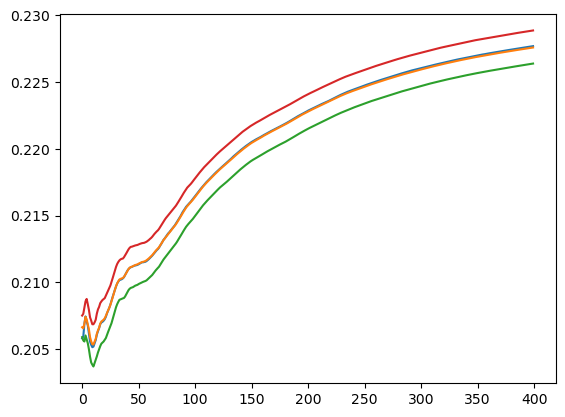

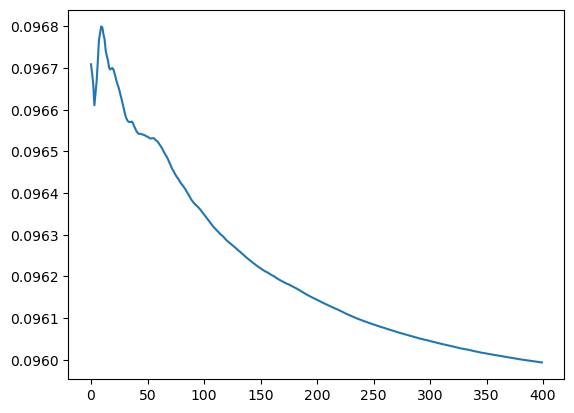

In [58]:
plot_standing_average(loss_df["mean"].to_numpy().squeeze(), show=False)
plot_standing_average(loss_df["avg"].to_numpy().squeeze(), show=False)
plot_standing_average(loss_df["min"].to_numpy().squeeze(), show=False)
plot_standing_average(loss_df["max"].to_numpy().squeeze(), show=False)
plt.show()

plot_standing_average(loss_df["mmd"].to_numpy().squeeze())

In [37]:
def print_loss_analysis(array: np.ndarray):
    print("mean:", array.mean())
    print("std:", array.std())
    print("max:", array.max())
    print("min:", array.min())
    print("range:", array.max() - array.min())

    plt.hist(array)
    plt.show()

mean: 0.22767354641276388
std: 0.007537503006293343
max: 0.2345476578515743
min: 0.2013251416678328
range: 0.0332225161837415


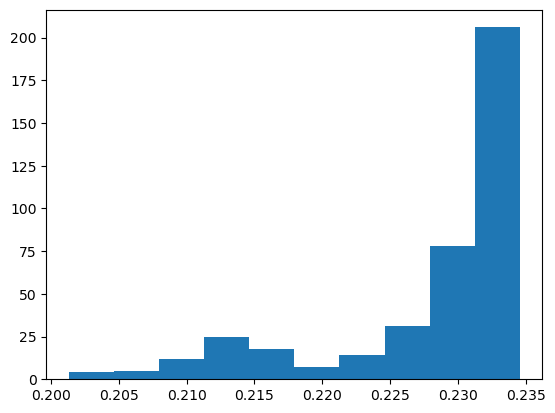

mean: 0.2275709237296233
std: 0.007459564058916787
max: 0.2330411241935199
min: 0.2018756868378047
range: 0.031165437355715198


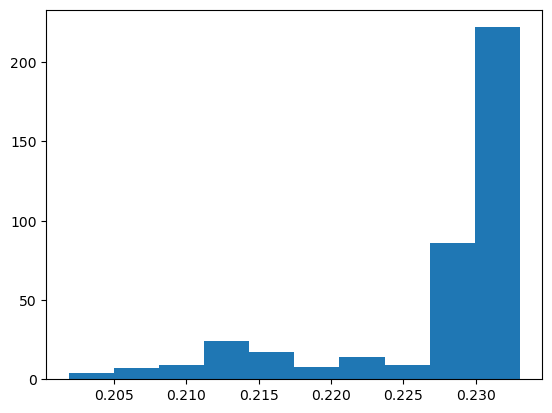

mean: 0.22637024378949053
std: 0.007602770972953758
max: 0.2320961051913698
min: 0.2005428719161798
range: 0.031553233275189996


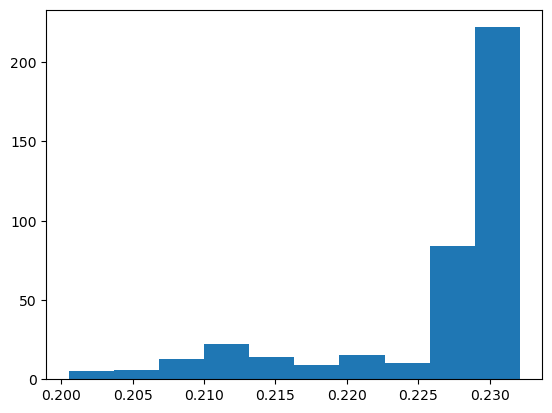

mean: 0.22884581128767667
std: 0.0074140992241155165
max: 0.2349068458019544
min: 0.2035220136926298
range: 0.031384832109324606


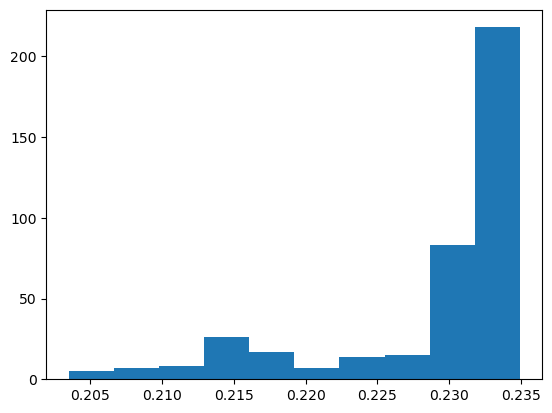

mean: 0.09599346438589486
std: 0.00024974782434511477
max: 0.0971292712087531
min: 0.0957171687218149
range: 0.0014121024869381965


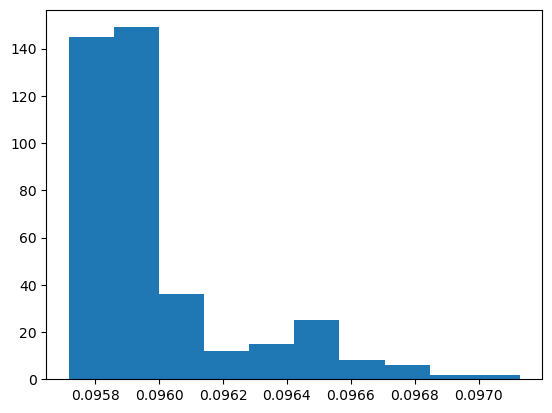

In [38]:
print_loss_analysis(loss_df["mean"].to_numpy().squeeze())
print_loss_analysis(loss_df["avg"].to_numpy().squeeze())
print_loss_analysis(loss_df["min"].to_numpy().squeeze())
print_loss_analysis(loss_df["max"].to_numpy().squeeze())
print_loss_analysis(loss_df["mmd"].to_numpy().squeeze())

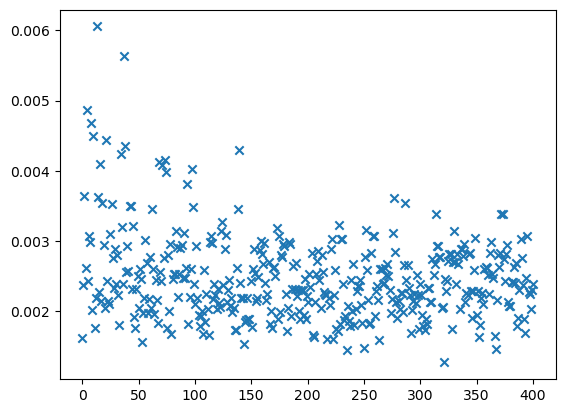

mean: 0.0024755674981861387
std: 0.0006199102470276552
max: 0.0060564376180990975
min: 0.001264973194338409
range: 0.0047914644237606885


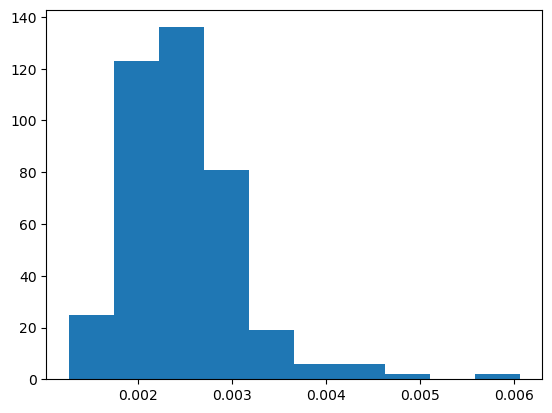

In [46]:
x_vals = np.linspace(0, len(loss_df["diff"]), len(loss_df["diff"]))
plt.scatter(x_vals, loss_df["diff"], marker="x")
plt.show()

print_loss_analysis(loss_df["diff"].to_numpy().squeeze())